In [1]:
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, FloatType, BooleanType, DoubleType

In [2]:
import string
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tslearn.metrics import cdist_normalized_cc

/home2/s153445/.conda/envs/thesis/lib/python3.8/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master('local[9]') \
    .config("spark.driver.memory", "15g") \
    .config("spark.sql.repl.eagerEval.enabled", True) \
    .getOrCreate()

### Load data

In [4]:
schema = StructType([
    StructField("bigram", StringType(), True),
    StructField("year", IntegerType(), True),
    StructField("count", IntegerType(), True),
    StructField("bigram_percent", DoubleType(), True),
    StructField("bigram_percent_smooth", DoubleType(), True),
    StructField("label", IntegerType(), True),
    StructField("max_year", IntegerType(), True)])

In [84]:
df = spark.read.option('header', False).schema(schema)\
                     .csv('/data/shared1/cleandata/changepoint_annotated_allntiles_newer')

### Individual trajectory plots

In [102]:
bowel = df.where(col('bigram') == 'bowel_noun cancer_noun').toPandas()
neural = df.where(col('bigram') == 'neural_adj network_noun').toPandas()

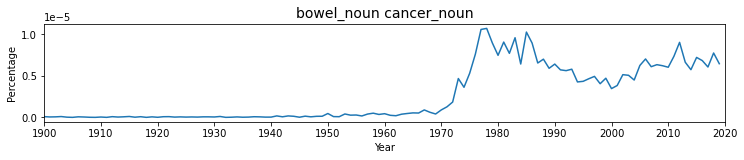

In [103]:
plt.figure(figsize=(12.2,1.8))
plt.plot(bowel.bigram_percent.values)
plt.xlabel('')
plt.ylabel('')
x = np.arange(0,121,10)
xlabels = np.arange(1900,2021,10)
plt.xticks(x, labels=xlabels)
plt.xlim([0,120])
plt.title('bowel_noun cancer_noun', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.savefig('bowel', bbox_inches='tight')
plt.show()

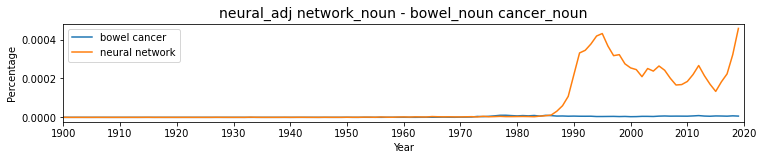

In [101]:
plt.figure(figsize=(12.2,1.8))
plt.plot(bowel.bigram_percent.values)
plt.plot(neural.bigram_percent.values)
plt.legend(['bowel cancer', 'neural network'])
plt.xlabel('')
plt.ylabel('')
x = np.arange(0,121,10)
xlabels = np.arange(1900,2021,10)
plt.xticks(x, labels=xlabels)
plt.xlim([0,120])
plt.title('neural_adj network_noun - bowel_noun cancer_noun', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.savefig('neural_bowel', bbox_inches='tight')
plt.show()

In [38]:
plotbigram = plot.toPandas()

In [29]:
war = plotbigram[plotbigram.bigram ==  'devastating_adj war_noun']

In [40]:
press = plotbigram[plotbigram.bigram ==  'mit_noun press_noun']

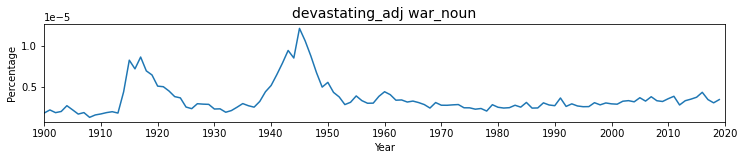

In [30]:
plt.figure(figsize=(12.2,1.8))
plt.plot(war.bigram_percent.values)
plt.xlabel('')
plt.ylabel('')
x = np.arange(0,121,10)
xlabels = np.arange(1900,2021,10)
plt.xticks(x, labels=xlabels)
plt.xlim([0,120])
plt.title('devastating_adj war_noun', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.savefig('war', bbox_inches='tight')
plt.show()

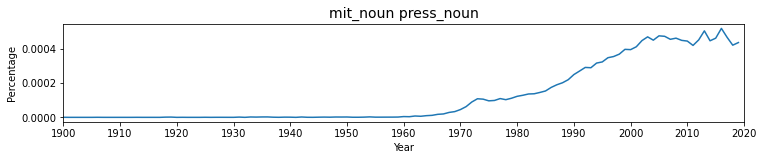

In [42]:
plt.figure(figsize=(12.2,1.8))
plt.plot(press.bigram_percent.values)
plt.xlabel('')
plt.ylabel('')
x = np.arange(0,121,10)
xlabels = np.arange(1900,2021,10)
plt.xticks(x, labels=xlabels)
plt.xlim([0,120])
plt.title('mit_noun press_noun', fontsize=14)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.savefig('mit_press', bbox_inches='tight')
plt.show()